1/1 [==============================] - 1s 850ms/step
Image: C:\\Users\\marti\\Desktop\\dom\\Data\\ISIC_0030329.jpg
Predicted Class: nevus
Class Probabilities (Top 3):
nevus: 0.9990
pigmented benign keratosis: 0.0010
dermatofibroma: 0.0000


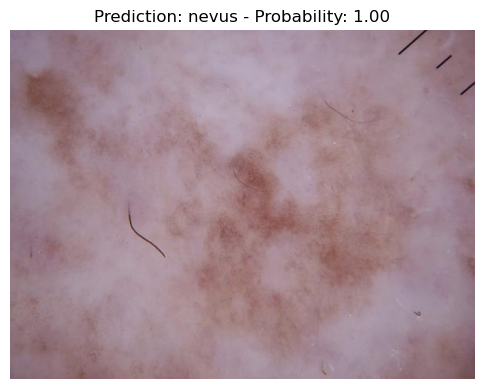

1/1 [==============================] - 0s 113ms/step
Image: C:\\Users\\marti\\Desktop\\dom\\Data\\ISIC_0032991.jpg
Predicted Class: nevus
Class Probabilities (Top 3):
nevus: 0.9989
pigmented benign keratosis: 0.0011
dermatofibroma: 0.0000


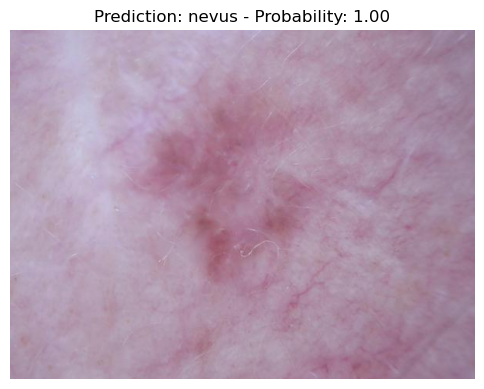

In [8]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the pre-trained model from file
model_path = r"C:\\Users\\marti\\Desktop\\dom\\best_model.h5"
model = load_model(model_path)

# Class indices and corresponding labels
class_labels = {
    0: 'actinic keratosis',
    1: 'basal cell carcinoma',
    2: 'dermatofibroma',
    3: 'melanoma',
    4: 'nevus',
    5: 'pigmented benign keratosis',
    6: 'squamous cell carcinoma',
    7: 'vascular lesion'
}

# Function to test images and display the results
def predict_on_new_images(model, image_paths):
    """
    Predict the classes of new images and display the results with their labels and probabilities.
    
    Args:
        model: The pre-trained model.
        image_paths: List of image paths to predict.
    """
    for img_path in image_paths:
        # Check if the image exists
        if not os.path.exists(img_path):
            print(f"Image not found: {img_path}")
            continue
        
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalization (if necessary)

        # Perform the prediction
        prediction = model.predict(img_array)

        # Get the predicted class index
        predicted_class_index = np.argmax(prediction)
        predicted_class = class_labels[predicted_class_index]

        # Get the prediction probabilities for all classes
        prediction_probabilities = prediction[0]

        # Sort class probabilities in descending order
        class_probabilities = {class_labels[i]: prob for i, prob in enumerate(prediction_probabilities)}
        sorted_class_probabilities = dict(sorted(class_probabilities.items(), key=lambda item: item[1], reverse=True))

        # Display the image
        plt.figure(figsize=(6, 6))
        plt.imshow(plt.imread(img_path))
        plt.axis('off')

        # Display the predicted class with its probability
        plt.title(f"Prediction: {predicted_class} - Probability: {prediction_probabilities[predicted_class_index]:.2f}")

        # Show the image and the class probabilities in the console
        print(f"Image: {img_path}")
        print(f"Predicted Class: {predicted_class}")
        print("Class Probabilities (Top 3):")
        for label, prob in list(sorted_class_probabilities.items())[:3]:
            print(f"{label}: {prob:.4f}")

        # Show the image
        plt.show()

# Example usage
image_paths = [
    r"C:\\Users\\marti\\Desktop\\dom\\Data\\ISIC_0030329.jpg",  
    r"C:\\Users\\marti\\Desktop\\dom\\Data\\ISIC_0032991.jpg"
]

# Use the function to test the images
predict_on_new_images(model, image_paths)


In [3]:
print("Class Indices from Model:", class_indices)


Class Indices from Model: {'nevus': 0, 'pigmented benign keratosis': 1, 'melanoma': 2, 'basal cell carcinoma': 3, 'squamous cell carcinoma': 4, 'vascular lesion': 5, 'dermatofibroma': 6, 'actinic keratosis': 7}
